













































# Lab 2: Logistic regression - Titanic

https://www.kaggle.com/c/titanic/data

In [59]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [60]:
import sklearn as sk

In [61]:
filename = 'titanic'

from urllib.request import urlretrieve
urlretrieve("https://bianchi.wp.imt.fr/files/2023/12/titanic.zip", filename + '.zip')

import os
zip_file = os.path.join(os.getcwd(), 'titanic.zip')

import zipfile
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [62]:
# read the training data set and store to df
df = pd.read_csv("traintitanic.csv")


In [63]:
# Using head(), info(), describe() etc. inspect the dataset. Which features are numerical, which ones are categorical? Comment about missing data.
df.head()
# the features survived, pclass, age, SibSp, Parch and Fare are numerical
# the features Name, sex, Cabin, embarked and ticket are categorical 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
# check missing data(check non-full count of a column with rows, at here rows = 891)
df.info()
# there are missing data for features Age, Cabin and embarked
# Cabin: more than 70% of the values are missing. This feature might not be useful
# Age: important feature and not missing much data, can use the median of age to fill up the missing blank
# Embarked: Only missing two entries, just fill up by mode (most common value)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
# Using the df.groupby("Pclass"), comment about the nature of the passengers as a function of the class ticket (first, second or third class)
df.groupby("Pclass")["Survived"].mean()
# it clearly shows that passengers with higher class tend to have higher survival rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0, 0.5, '# passenger')

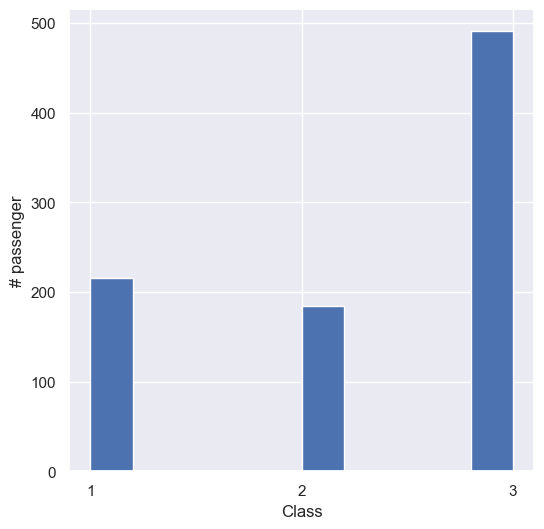

In [67]:
# Plot the histogram of Passenger's classes
plt.figure(figsize=(6,6))
df["Pclass"].hist()
plt.xticks([1, 2, 3])
plt.xlabel('Class')
plt.ylabel('# passenger')

In [68]:
# Comment about the impact of the sex of passengers
df.groupby("Sex")["Survived"].mean()
# female tend to have relative servival rate than male

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [69]:
# Comment about the impact of the embarkation city. How do you explain the discrepancies in survival rate?
df.groupby("Embarked")["Survived"].mean()
# diff embarkation city tend to have more survival rate, this may because some economic reasons. 
# people embarked from city C have more first class passengers, thus have higher survival rate

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Female')

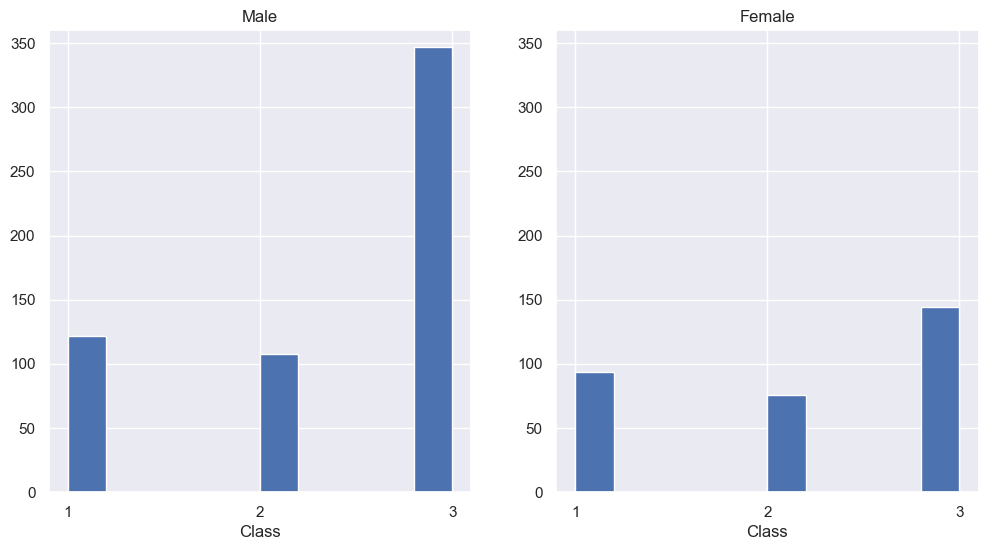

In [70]:
#Plot the histogram of the number of men in each class. Do the same for women. Comment.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df[df['Sex'] == 'male']["Pclass"].hist() ## 对于数据库中 sex == male 的数据，根据 不同 pclass 的人数画图 
plt.xticks([1, 2, 3])
plt.xlabel('Class')
plt.ylim([0, 360]) # y 轴 range
plt.title('Male')

plt.subplot(1, 2, 2)
df[df['Sex'] == 'female']["Pclass"].hist()
plt.xticks([1, 2, 3])
plt.xlabel('Class')
plt.ylim([0, 360])
plt.title('Female')

# for all classes, the number of men is higher than women
# for the first and second class, the number of men and women are similar
# for the third class, the number of men is much higher then women

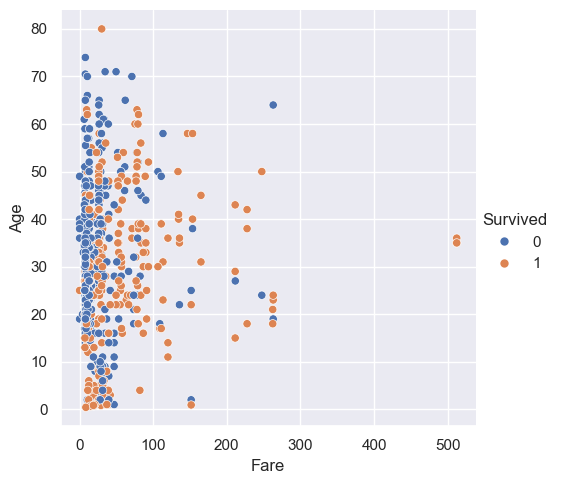

In [71]:
# Comment briefly the following code
sns.relplot(data=df,x="Fare", y="Age",hue="Survived") # hue 代表根据这个变量在颜色上进行区分

# this plot clearly show that yonger age passengers, espically yonger than 10, having higher survival rate, this make sence that when disaster happens people tend to protect the chlidren first
# also passengers paid a higer fare tend to have a higher survival rate. The two passengers paid the highest fare ($500) all survived

In [72]:
# In case you believe that other plots are interesting to vizualize the data set, you can provide them here.


# Categorical encoding

Certain columns (sex, embarked, etc.) are categorical. We need to transform them into numerical features.

In [73]:
# Create a new column "Sex_num" where the strings "male" and "female" are replaced by a binary integer.
# 给数据列创建一个新的变量用于 numerical 化 binary 变量
df["Sex_num"] = (df["Sex"]=="male").astype("int") #That's ok because there is no missing data in the "Sex" column

In [74]:
# What is the following code doing?
# doing the One-Hot encoding
# 把3个category分成独立的三行，用0和1表示。也就是把这个 categorical 变量拆分成对应种类的数据列

# 在进行 get_dummies 之前一定要把 missing value 补齐
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # 用 [0] 表示却表只填入一个值，因为 mode 可以存在多个值(same frequency)

pd.get_dummies(df['Embarked']) # 这个函数自动把种类变量变成单独的列，并且转化为 true / false 表格

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [75]:
# Using pd.get_dummies, create new columns in the dataframe df, one for each embarkation port
ports = pd.get_dummies(df['Embarked']) # 创建一个 891*3 的 data frame, 用 prefix 确保值不会随着 embarked 变动而变动，为了后面删除 embarked
df = pd.concat([df, ports], axis = 1) # 用 concat来扩展数据列 并且重新赋值给 df, 一定要加 axis = 1 代表按列拼接，默认是0 按行拼接

In [76]:
# We may drop the two columns "Sex" and "Embarked", as we now included their onehot counterparts in the dataframe. Check that the following code drops theses columns
# 用 drop 去掉无用行
df.drop(columns=["Sex","Embarked", "Name", "Ticket", "Cabin"], inplace=True)
# inplace 来表 change made directly to df
# equivalent: df = df.drop(columns=['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'])


In [77]:
# Use df.head(). Did the dropped column disappear? Solve possible issued using the argument inplace=True, in the drop method
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,False,False,True
1,2,1,1,38.0,1,0,71.2833,0,True,False,False
2,3,1,3,26.0,0,0,7.9250,0,False,False,True
3,4,1,1,35.0,1,0,53.1000,0,False,False,True
4,5,0,3,35.0,0,0,8.0500,1,False,False,True


<Axes: >

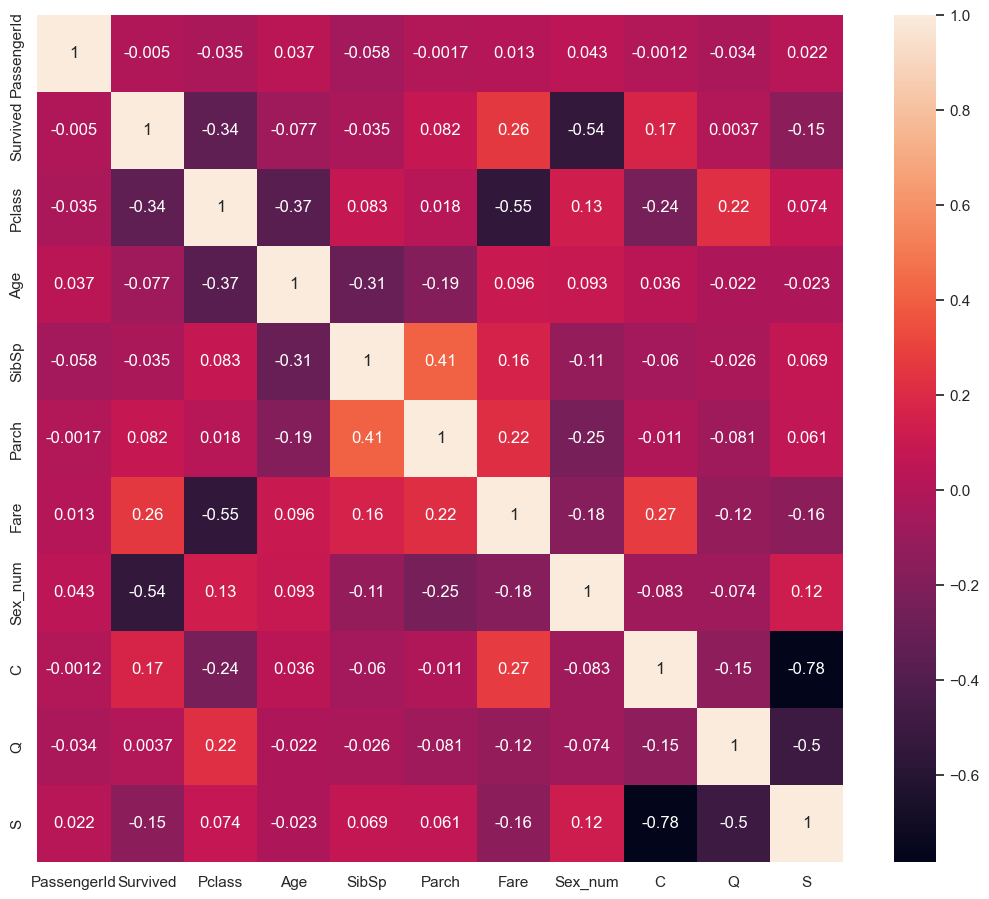

In [78]:
# What does the matrix df.corr() represent? Provide your interpretation of the numbers you see.
sns.set(rc = {'figure.figsize':(13,11)})
sns.heatmap(df.corr(),annot=True)
# computes the Pearson correlation coefficient matrix between all numerical columns in the DataFrame.

# Data cleansing
Check the number of missing values in "Age". You can either


*   Do nothing (the rows with missing "Age" will be ignored in the training stage)
*   Or fill the missing values with some value of your choice.


Do something smart.



In [79]:
# Do something smart to handle the problem of missing values in the "Age" column
# 用 median 填补空缺
df['Age'] = df['Age'].fillna(df['Age'].median())


In [80]:
# We will train a logistic regression. Write below the columns which you would like to keep as features for logistic regression.
# n.b.: We will NOT keep the columns Ticket and Cabin. Why?
mycolumns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'C', 'Q', 'S']

#Logistic regression


In [ ]:
# Train a logistic regression classifier using sklearn, based on the above dataframe and the chosen columns.
# Explain the meaning of the parameter in the logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=1.0,max_iter=1000) # 这个函数里面自动包括了梯度下降的拟合优化！！
# penalty = 12 代表 L2 正则化 (L2 regularization)，惩罚系数过大出现过度拟合的情况
# c 代表正则化系数的倒数，越小正则化却强，默认为 1，平衡正则化和拟合能力
# max_iter 代表最多迭代次数，确保模型可以收敛

# We used logistic regression with L2 regularization (penalty='l2') to avoid overfitting. 
# The regularization strength was controlled by C=1.0, and the optimization process was allowed up to 1000 iterations (max_iter=1000) to ensure convergence.

In [82]:
# define target
y = df['Survived']

# define features
X = df[mycolumns]

# Fit the model
lr.fit(X,y)

LogisticRegression(max_iter=1000)

In [83]:
# Display the coefficients of the logistic regression. Discuss the possible positive/negative impact on survival of certain parameters
for feature, coef in zip(X.columns, lr.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# 这里Intercept没有什么实际意义(但默认是需要的)，从结果看最显著的是 Pclass(calss越高级生还率越高) 和 Sex_num (男性生还率显著低于女性)




Pclass: -1.0650
Age: -0.0382
SibSp: -0.3144
Parch: -0.0806
Fare: 0.0022
Sex_num: -2.6186
C: 0.1521
Q: 0.0964
S: -0.2465


# Performance evaluation


In [84]:
# Load the test data
Xtest = pd.read_csv("testtitanic.csv")
ytest = pd.read_csv("gender_submission.csv")
dftest = pd.merge(Xtest,ytest)

In [85]:
# Process the test features in order to obtain the same format as for the train set

# fill missing data
dftest.info()
dftest['Age'] = dftest['Age'].fillna(dftest['Age'].median())
dftest['Fare'] = dftest['Fare'].fillna(dftest['Fare'].median())

# do one-hot encoding
dftest['Sex_num'] = (dftest['Sex'] == 'male').astype(int)

ports_test = pd.get_dummies(dftest['Embarked'])
dftest = pd.concat([dftest, ports_test], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [86]:
# Define a dataframe with only the columns you want to keep (and the label)
dftest=dftest[mycolumns + ["Survived"]]
dftest.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_num,C,Q,S,Survived
0,3,34.5,0,0,7.8292,1,False,True,False,0
1,3,47.0,1,0,7.0000,0,False,False,True,1
2,2,62.0,0,0,9.6875,1,False,True,False,0
3,3,27.0,0,0,8.6625,1,False,False,True,0
4,3,22.0,1,1,12.2875,0,False,False,True,1


In [87]:
# Check if there are some missing values. If needed, row containing missing values can be dropped using the dropna() method (inplace)
dftest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      418 non-null    float64
 5   Sex_num   418 non-null    int32  
 6   C         418 non-null    bool   
 7   Q         418 non-null    bool   
 8   S         418 non-null    bool   
 9   Survived  418 non-null    int64  
dtypes: bool(3), float64(2), int32(1), int64(4)
memory usage: 22.6 KB


In [88]:
# Compute the hard predictions on the test set (using only the columns to keep)
y_pred = lr.predict(dftest[mycolumns]) # 用 test 数据进行预测
print(y_pred)


[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
# Compute the accuracy score
from sklearn.metrics import accuracy_score

acc = accuracy_score(dftest['Survived'], y_pred) # 用这个函数可以直接得到准确度

print("Accuray Score is: ", acc)

Accuray Score is:  0.9401913875598086


In [90]:
# Compute the soft predictions unsing predict_proba
y_prob = lr.predict_proba(dftest[mycolumns])[:, 1] # 代表只需要生还的概率
print(y_prob[:10])


[0.10767262 0.34681754 0.10939922 0.1025499  0.56301895 0.15828019
 0.66271868 0.19515237 0.76653995 0.0734385 ]


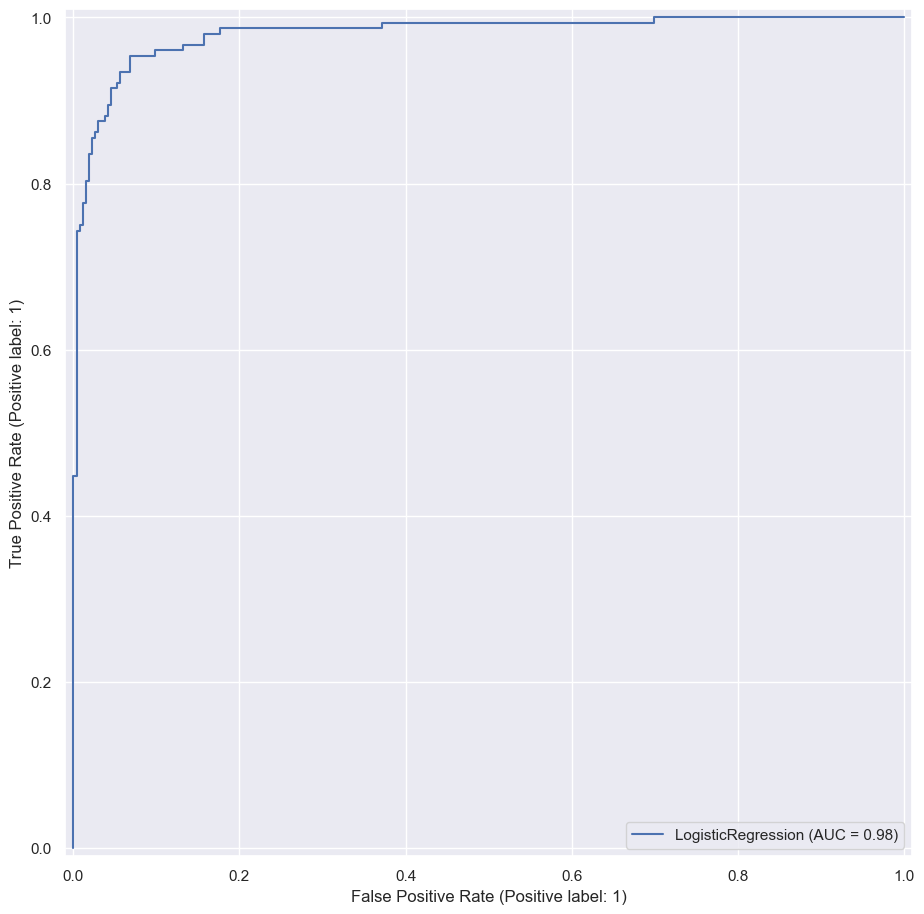

In [91]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr, dftest[mycolumns], dftest["Survived"])

# ROC 曲线用来展示模型在不同分类阈值下的表现。
# 横轴是假正率（误把负样本当正的比例）；
# 纵轴是真正率（正确识别正样本的比例）；
#曲线下的面积 AUC 越大表示模型性能越好。

# Bonus question: do whatever you find useful

Here are some examples:

*   Try to include useful elements of the Cabin number
*   Try different regularization parameters
* Try L1 regularization instead of ridge
* Try linear regression



